<h1> Solar Forecast Project </h1>
<h3> By Anthony Ganci</h3>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

data = pd.read_csv('solar_training.csv')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP']).astype(np.int64)

dataTest = pd.read_csv('solar_test.csv')
dataTest['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP']).astype(np.int64)

data


,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,1333242000000000000,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,1333245600000000000,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,1333249200000000000,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,1333252800000000000,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,1333256400000000000,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32827,3,1372622400000000000,0.000282,0.000000,93004.8750,93.563721,0.030579,0.326382,0.959934,273.410156,8714422.0,18433904.0,10020996.0,0.000000,0.000000
32828,3,1372626000000000000,0.000153,0.000000,93054.9375,93.547058,0.000000,0.387633,1.164658,273.242920,8714422.0,19345760.0,10020996.0,0.000000,0.000025
32829,3,1372629600000000000,0.000000,0.000000,93079.7500,92.827271,0.003815,0.264710,0.638873,273.979981,8791648.0,20239664.0,10153707.0,0.000000,0.087925
32830,3,1372633200000000000,0.000191,0.000000,93096.8750,83.627655,0.007629,0.295467,-0.092196,277.357910,9345027.0,21175104.0,10860760.0,0.000000,0.423100


In [109]:
zone1train = data[data['ZONEID'] == 1]
print(zone1train.head())
zone1test = dataTest[dataTest['ZONEID'] == 1]
# print(zone1test.head())
zone1train.head()

   ZONEID            TIMESTAMP     VAR78     VAR79      VAR134     VAR157  \
0       1  1333242000000000000  0.001967  0.003609  94843.6250  60.221909   
1       1  1333245600000000000  0.005524  0.033575  94757.9375  54.678604   
2       1  1333249200000000000  0.030113  0.132009  94732.8125  61.294891   
3       1  1333252800000000000  0.057167  0.110645  94704.0625  67.775284   
4       1  1333256400000000000  0.051027  0.189560  94675.0000  70.172989   

     VAR164    VAR165    VAR166      VAR167      VAR169     VAR175  \
0  0.244601  1.039334 -2.503039  294.448486   2577830.0  1202532.0   
1  0.457138  2.482865 -2.993330  295.651367   5356093.0  2446757.0   
2  0.771429  3.339867 -1.982535  294.454590   7921788.0  3681336.0   
3  0.965866  3.106102 -1.446051  293.261475   9860520.0  4921504.0   
4  0.944669  2.601146 -1.904493  292.732910  11143097.0  6254380.0   

       VAR178    VAR228     POWER  
0   2861797.0  0.000000  0.754103  
1   5949378.0  0.000000  0.555000  
2   8939

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,1333242000000000000,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,1333245600000000000,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,1333249200000000000,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,1333252800000000000,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,1333256400000000000,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [110]:
zone2train = data[data['ZONEID'] == 2]
print(zone2train.head())
zone2test = dataTest[dataTest['ZONEID'] == 2]
print(zone2test.head())

       ZONEID            TIMESTAMP     VAR78     VAR79      VAR134     VAR157  \
10944       2  1333242000000000000  0.001479  0.005444  94290.6250  57.374252   
10945       2  1333245600000000000  0.018304  0.101553  94217.6875  57.129776   
10946       2  1333249200000000000  0.035255  0.112935  94201.0625  63.076141   
10947       2  1333252800000000000  0.064514  0.107761  94156.0625  62.975479   
10948       2  1333256400000000000  0.059495  0.157593  94124.2500  65.053848   

         VAR164    VAR165    VAR166      VAR167      VAR169     VAR175  \
10944  0.190966  0.857938 -2.801623  294.393310   2595302.0  1192092.0   
10945  0.517135  2.594071 -2.653242  294.962402   5374973.0  2420485.0   
10946  0.705222  2.881371 -1.647819  293.876709   7858492.0  3643656.0   
10947  0.993363  3.024803 -1.496832  293.071289   9719720.0  4885120.0   
10948  0.937604  2.521556 -1.836622  292.544434  11054009.0  6211372.0   

           VAR178    VAR228     POWER  
10944   2884677.0  0.000000 

In [111]:
zone3train = data[data['ZONEID'] == 3]
print(zone3train.head())
zone3test = dataTest[dataTest['ZONEID'] == 3]
print(zone3test.head())

       ZONEID            TIMESTAMP     VAR78     VAR79      VAR134     VAR157  \
21888       3  1333242000000000000  0.003531  0.024673  92667.6250  57.003159   
21889       3  1333245600000000000  0.027482  0.140474  92622.6875  64.960831   
21890       3  1333249200000000000  0.032356  0.136617  92598.8125  66.795868   
21891       3  1333252800000000000  0.031952  0.097370  92542.0625  65.177628   
21892       3  1333256400000000000  0.048494  0.163773  92508.0000  65.744278   

         VAR164    VAR165    VAR166      VAR167      VAR169     VAR175  \
21888  0.238147  0.986234 -3.133410  293.903565   2606438.0  1158284.0   
21889  0.561615  2.688432 -2.574873  293.196533   5352637.0  2341093.0   
21890  0.661612  2.884544 -1.893668  292.592529   7714300.0  3531304.0   
21891  0.941559  3.175682 -1.639898  292.174805   9619368.0  4740096.0   
21892  0.944684  2.697337 -1.880079  291.584473  11054009.0  6014412.0   

           VAR178    VAR228     POWER  
21888   2901861.0  0.000000 

In [112]:
from sklearn.feature_selection import f_regression, SelectKBest

X = data.iloc[:,1:14]
Y = data.iloc[:,-1]

bestFeature = SelectKBest(score_func=f_regression, k=6)
fit = bestFeature.fit(X,Y)

dataScores = pd.DataFrame(fit.scores_)
dataColumns = pd.DataFrame(X.columns)

featuresScores = pd.concat([dataColumns, dataScores], axis=1)
featuresScores.columns = ['Features', 'Score']
featuresScores.sort_values(by = 'Score')

,Features,Score
0,TIMESTAMP,2.094373
3,VAR134,57.336888
1,VAR78,223.384058
2,VAR79,255.086969
5,VAR164,340.637371
12,VAR228,501.889878
9,VAR169,711.504356
6,VAR165,1129.465644
11,VAR178,1215.832633
7,VAR166,1299.519582


In [113]:
# X_train = data.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
# y_train = data['POWER']

# dtnew = dataTest[np.isfinite(dataTest).all(1)]
# X_test = dtnew.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
# y_test = dtnew['POWER']

In [114]:
zone1_X_train = zone1train.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone1_y_train = zone1train['POWER']

zone1test = zone1test[np.isfinite(zone1test).all(1)]
zone1_X_test = zone1test.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone1_y_test = zone1test['POWER']

zone2_X_train = zone2train.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone2_y_train = zone2train['POWER']

zone2test = zone2test[np.isfinite(zone2test).all(1)]
zone2_X_test = zone2test.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone2_y_test = zone2test['POWER']

zone3_X_train = zone3train.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone3_y_train = zone3train['POWER']

zone3test = zone3test[np.isfinite(zone3test).all(1)]
zone3_X_test = zone3test.drop(['POWER', 'VAR134', 'TIMESTAMP', 'VAR78', 'VAR79'], axis='columns')
zone3_y_test = zone3test['POWER']


In [115]:
def processZone(zone, X_train, y_train, X_test, y_test):
    #found from gridsearch
    best_params = {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
    from sklearn.preprocessing import StandardScaler
    scX = StandardScaler()
    X_train = scX.fit_transform(X_train)
    X_test = scX.transform(X_test)
    scY = StandardScaler()
    y_train = scY.fit_transform(y_train.values.reshape(-1,1))
    y_test = scY.transform(y_test.values.reshape(-1,1))

    from sklearn.ensemble import RandomForestRegressor
    rf_reg = RandomForestRegressor(**best_params)
    regressor = rf_reg.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics
    # print(f'params in use: {rf_reg.get_params()}')
    # print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    # print("Root Mean Squared Error:",  metrics.mean_squared_error(y_test, y_pred, squared=False))
    # print("R2 Score:",  metrics.r2_score(y_test, y_pred))

    y_pred_orig = scY.inverse_transform(y_pred.reshape(-1,1))
    y_test_orig = scY.inverse_transform(y_test)
    print(f'{zone}: Mean Absolute Error for Test Predicitions: {metrics.mean_absolute_error(y_test_orig, y_pred_orig):.3f}')
    print(f'{zone}: Root Mean Squared Error for Test Predicitions: {metrics.mean_squared_error(y_test_orig, y_pred_orig, squared=False):.3f}')
    print(f'{zone}: R2 Score for Test Predicitions: {metrics.r2_score(y_test_orig, y_pred_orig):.3f}')

    train_pred = regressor.predict(X_train)
    train_pred_orig = scY.inverse_transform(train_pred.reshape(-1,1))
    y_train_orig = scY.inverse_transform(y_train)
    print(f'{zone}: Mean Absolute Error for Training Predicitions: {metrics.mean_absolute_error(y_train_orig, train_pred_orig):.3f}')
    print(f'{zone}: Root Mean Squared Error for Training Predicitions: {metrics.mean_squared_error(y_train_orig, train_pred_orig, squared=False):.3f}')
    print(f'{zone}: R2 Score for Training Predicitions: {metrics.r2_score(y_train_orig, train_pred_orig):.3f}')

    actual = y_test_orig.sum().round(2)
    pred = y_pred_orig.sum().round(2)
    print(f'{zone}: Actual Power Generated: {actual} vs Predicted Power Generated: {pred}\n')

    plt.figure(figsize=(16,6))
    plt.subplot(1,2,2)
    plt.scatter(y_pred_orig, y_test_orig)
    plt.xlabel('Predicted Generated Power on Test Data')
    plt.ylabel('Real Generated Power on Test Data')
    plt.title('Test Predictions vs Real Data')
    plt.subplot(1,2,1)
    plt.scatter(train_pred_orig, y_train_orig)
    plt.xlabel('Predicted Generated Power on Training Data')
    plt.ylabel('Real Generated Power on Training Data')
    plt.title('Training Predictions vs Real Data')
    plt.show()
    return actual,pred, metrics.mean_absolute_error(y_test_orig, y_pred_orig), metrics.mean_squared_error(y_test_orig, y_pred_orig, squared=False)

ZONE1: Mean Absolute Error for Test Predicitions: 0.059
ZONE1: Root Mean Squared Error for Test Predicitions: 0.105
ZONE1: R2 Score for Test Predicitions: 0.835
ZONE1: Mean Absolute Error for Training Predicitions: 0.035
ZONE1: Root Mean Squared Error for Training Predicitions: 0.068
ZONE1: R2 Score for Training Predicitions: 0.932
ZONE1: Actual Power Generated: 1486.14 vs Predicted Power Generated: 1568.73



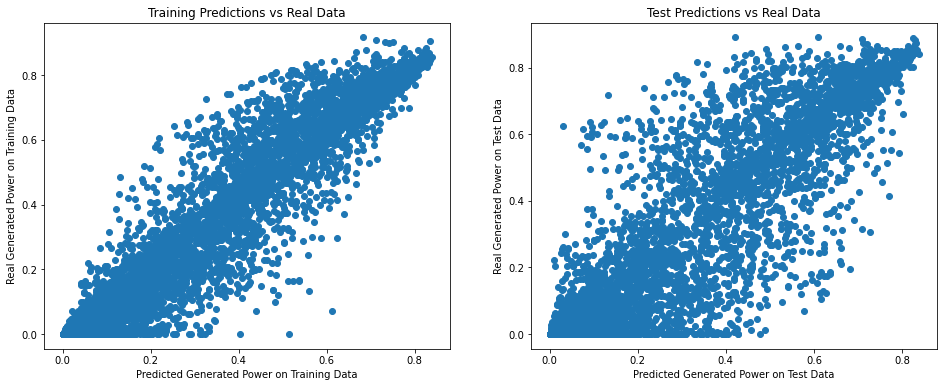

In [116]:
zone1actual, zone1pred, zone1mae, zone1rmse = processZone('ZONE1', zone1_X_train, zone1_y_train, zone1_X_test, zone1_y_test)

ZONE2: Mean Absolute Error for Test Predicitions: 0.060
ZONE2: Root Mean Squared Error for Test Predicitions: 0.103
ZONE2: R2 Score for Test Predicitions: 0.861
ZONE2: Mean Absolute Error for Training Predicitions: 0.035
ZONE2: Root Mean Squared Error for Training Predicitions: 0.062
ZONE2: R2 Score for Training Predicitions: 0.949
ZONE2: Actual Power Generated: 1645.06 vs Predicted Power Generated: 1712.49



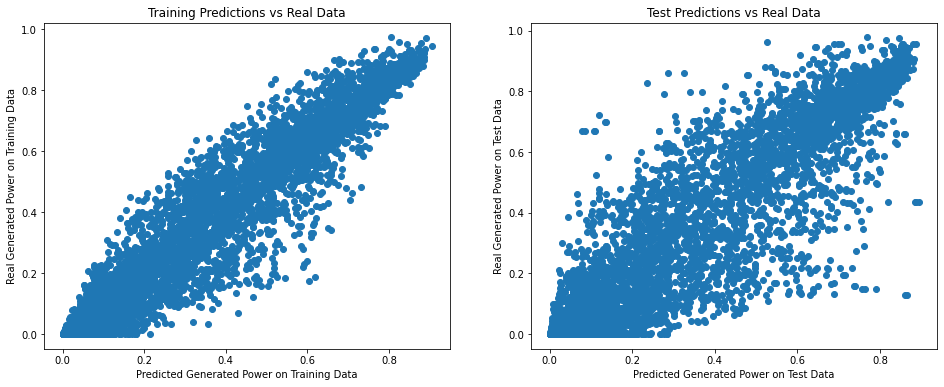

In [117]:
zone2actual, zone2pred, zone2mae, zone2rmse  = processZone('ZONE2', zone2_X_train, zone2_y_train, zone2_X_test, zone2_y_test)

ZONE3: Mean Absolute Error for Test Predicitions: 0.064
ZONE3: Root Mean Squared Error for Test Predicitions: 0.110
ZONE3: R2 Score for Test Predicitions: 0.843
ZONE3: Mean Absolute Error for Training Predicitions: 0.039
ZONE3: Root Mean Squared Error for Training Predicitions: 0.070
ZONE3: R2 Score for Training Predicitions: 0.940
ZONE3: Actual Power Generated: 1683.08 vs Predicted Power Generated: 1782.59



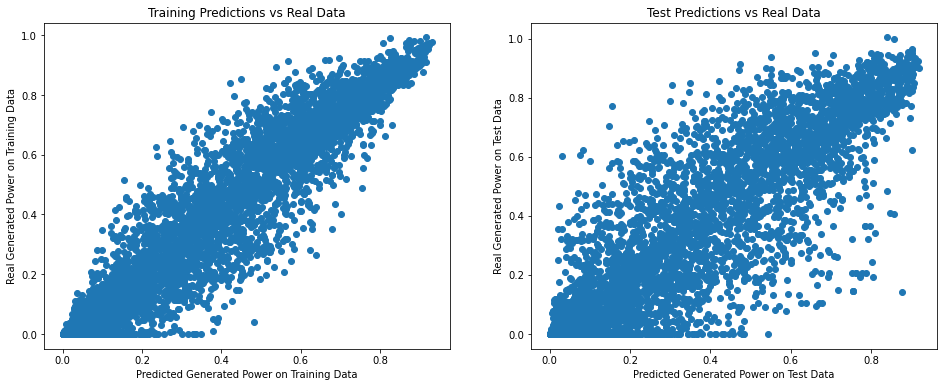

In [118]:
zone3actual, zone3pred, zone3mae, zone3rmse = processZone('ZONE3', zone3_X_train, zone3_y_train, zone3_X_test, zone3_y_test)

In [119]:
print(f'True Total Generated vs. Predicted Total Generated: {zone1actual + zone2actual + zone3actual} vs {zone1pred + zone2pred + zone3pred}')
print(f'Total Mean Absolute Error: {(zone1mae + zone2mae + zone3mae)/3:.3f}')
print(f'Total Root Mean Square Error: {(zone1rmse + zone2rmse + zone3rmse)/3:.3f}')

True Total Generated vs. Predicted Total Generated: 4814.28 vs 5063.81
Total Mean Absolute Error: 0.061
Total Root Mean Square Error: 0.106


In [166]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [4, 5],
#     'min_samples_split': [10, 12],
#     'n_estimators': [300, 500, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor(n_jobs= -1)
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs=-1, verbose = 0)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# best_params is what gridsearch returns but takes to long to run so commented out
best_params = {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
impRFR = RandomForestRegressor(n_jobs=-1, bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'], max_features=best_params['max_features'], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators'])
impRFR.fit(X_train, y_train)
y_pred = impRFR.predict(X_test)
print(f'params in use: {impRFR.get_params()}')
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:",  metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:",  metrics.r2_score(y_test, y_pred))
y_pred_orig = scY.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scY.inverse_transform(y_test)
print("Mean Absolute Error Test Predicitions:", metrics.mean_absolute_error(y_test_orig, y_pred_orig))
print("Root Mean Squared Error Test Predicitions:",  metrics.mean_squared_error(y_test_orig, y_pred_orig, squared=False))
print("R2 Score Test Predicitions:",  metrics.r2_score(y_test_orig, y_pred_orig))

train_pred = impRFR.predict(X_train)
train_pred_orig = scY.inverse_transform(train_pred.reshape(-1,1))
y_train_orig = scY.inverse_transform(y_train)
print("Mean Absolute Error Training Predicitions:", metrics.mean_absolute_error(y_train_orig, train_pred_orig))
print("Root Mean Squared Error Training Predicitions:",  metrics.mean_squared_error(y_train_orig, train_pred_orig, squared=False))
print("R2 Score Training Predicitions:",  metrics.r2_score(y_train_orig, train_pred_orig))
actual = y_test_orig.sum().round(2)
pred = y_pred_orig.sum().round(2)
print(actual, pred)

C:\Users\antho\AppData\Local\Temp\ipykernel_26796\4072808842.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  impRFR.fit(X_train, y_train)


params in use: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Mean Absolute Error: 0.2267310566919685
Root Mean Squared Error: 0.39256884682226617
R2 Score: 0.8427524316980324
Mean Absolute Error Test Predicitions: 0.06206485401717229
Root Mean Squared Error Test Predicitions: 0.10746092099246451
R2 Score Test Predicitions: 0.8427524316980325
Mean Absolute Error Training Predicitions: 0.03528931893219246
Root Mean Squared Error Training Predicitions: 0.06497815037417136
R2 Score Training Predicitions: 0.9436537215135244
4814.29 5076.94


In [167]:
from sklearn.model_selection import RandomizedSearchCV
# randomized grid which resulted in best results saved for reference 
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
y_pred = rf_random.predict(X_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:",  metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:",  metrics.r2_score(y_test, y_pred))
y_pred_orig = scY.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scY.inverse_transform(y_test)
print("Mean Absolute Error Test Predicitions:", metrics.mean_absolute_error(y_test_orig, y_pred_orig))
print("Root Mean Squared Error Test Predicitions:",  metrics.mean_squared_error(y_test_orig, y_pred_orig, squared=False))
print("R2 Score Test Predicitions:",  metrics.r2_score(y_test_orig, y_pred_orig))

train_pred = rf_random.predict(X_train)
train_pred_orig = scY.inverse_transform(train_pred.reshape(-1,1))
y_train_orig = scY.inverse_transform(y_train)
print("Mean Absolute Error Training Predicitions:", metrics.mean_absolute_error(y_train_orig, train_pred_orig))
print("Root Mean Squared Error Training Predicitions:",  metrics.mean_squared_error(y_train_orig, train_pred_orig, squared=False))
print("R2 Score Training Predicitions:",  metrics.r2_score(y_train_orig, train_pred_orig))
actual = y_test_orig.sum().round(2)
pred = y_pred_orig.sum().round(2)
print(actual, pred)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\antho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
Mean Absolute Error: 0.22700606617846833
Root Mean Squared Error: 0.3919897126207818
R2 Score: 0.8432160460289365
Mean Absolute Error Test Predicitions: 0.06214013450094007
Root Mean Squared Error Test Predicitions: 0.10730239008718889
R2 Score Test Predicitions: 0.8432160460289366
Mean Absolute Error Training Predicitions: 0.02283572836059003
Root Mean Squared Error Training Predicitions: 0.04251592416068085
R2 Score Training Predicitions: 0.9758768623435856
4814.29 5117.25


In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:",  metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 0.14176255604609767
Root Mean Squared Error: 0.19039159342733364


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
gpr.fit(X_train, y_train)
print(gpr.score(X_train, y_train))
y_pred = gpr.predict(X_test)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:",  metrics.mean_squared_error(y_test, y_pred, squared=False))


1.0
Mean Absolute Error: 0.18319203393907915
Root Mean Squared Error: 0.3271035035242895


In [13]:
from sklearn import svm
svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 0.19818873325339884
Root Mean Squared Error: 0.28335944614835096


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlpReg = MLPRegressor(max_iter=1000)

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd']}

gsc = GridSearchCV(
    mlpReg,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc.fit(X_train, y_train)
print('Best parameters found:\n', gsc.best_params_)

In [69]:
# {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000, activation= 'tanh', alpha= 0.05, hidden_layer_sizes=(50,100,50), learning_rate='constant', solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 0.9028420447707544
Root Mean Squared Error: 1.0111486814232682


c:\Users\antho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [80]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(1200,500,),activation='relu',solver='adam',alpha=0.0001,max_iter=500)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))
y_pred_orig = scY.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scY.inverse_transform(y_test)
print("Mean Absolute Error Test Predicitions:", metrics.mean_absolute_error(y_test_orig, y_pred_orig))
print("Root Mean Squared Error Test Predicitions:",  metrics.mean_squared_error(y_test_orig, y_pred_orig, squared=False))
print("R2 Score Test Predicitions:",  metrics.r2_score(y_test_orig, y_pred_orig))

train_pred = mlp.predict(X_train)
train_pred_orig = scY.inverse_transform(train_pred.reshape(-1,1))
y_train_orig = scY.inverse_transform(y_train)
print("Mean Absolute Error Training Predicitions:", metrics.mean_absolute_error(y_train_orig, train_pred_orig))
print("Root Mean Squared Error Training Predicitions:",  metrics.mean_squared_error(y_train_orig, train_pred_orig, squared=False))
print("R2 Score Training Predicitions:",  metrics.r2_score(y_train_orig, train_pred_orig))

c:\Users\antho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.4320419766711504
Root Mean Squared Error: 0.7276221724646531
Mean Absolute Error Test Predicitions: 0.11826620756156592
Root Mean Squared Error Test Predicitions: 0.1991776714339997
R2 Score Test Predicitions: 0.459788129568501
Mean Absolute Error Training Predicitions: 0.01695203931205992
Root Mean Squared Error Training Predicitions: 0.027716914762035277
R2 Score Training Predicitions: 0.9897477232692163
